In [172]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [173]:
dataPath = r"data\xAPI-Edu-Data.csv"
data = pd.read_csv(dataPath)

In [174]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [175]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [176]:
melt = pd.melt(data,id_vars='Class',value_vars=['raisedhands','VisITedResources','AnnouncementsView', 'Discussion'])

In [177]:
melt

,Class,variable,value
0,M,raisedhands,15
1,M,raisedhands,20
2,L,raisedhands,10
3,L,raisedhands,30
4,M,raisedhands,40
...,...,...,...
1915,L,Discussion,8
1916,M,Discussion,28
1917,M,Discussion,29
1918,L,Discussion,57


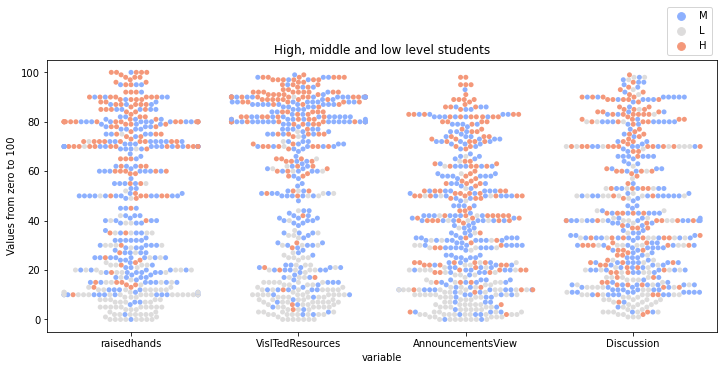

In [178]:
plt.figure(figsize=(12,5))
#sns.color_palette("Set1")
sns.swarmplot(x='variable',y='value',hue='Class' , data=melt,palette= 'coolwarm')
plt.ylabel('Values from zero to 100')
plt.title('High, middle and low level students')
plt.legend(loc='lower right', bbox_to_anchor=(1, 1))

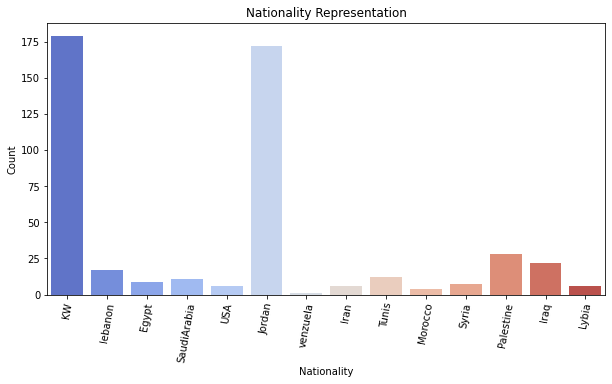

In [179]:

nat = sns.countplot(x='NationalITy', data=data, palette='coolwarm')
nat.set(xlabel='Nationality', ylabel='Count', title='Nationality Representation')
plt.setp(nat.get_xticklabels(), rotation=80)
plt.show()               

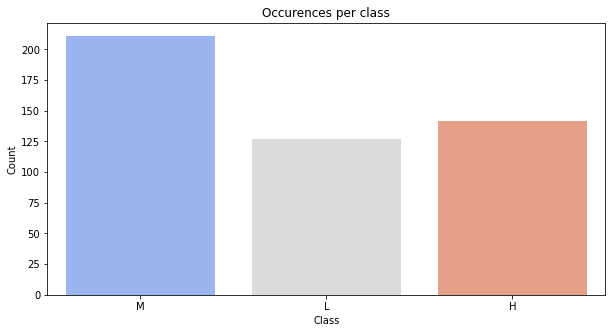

In [180]:
counts = sns.countplot(x='Class', data=data, palette='coolwarm')
counts.set(xlabel='Class', ylabel='Count', title='Occurences per class')
plt.show()

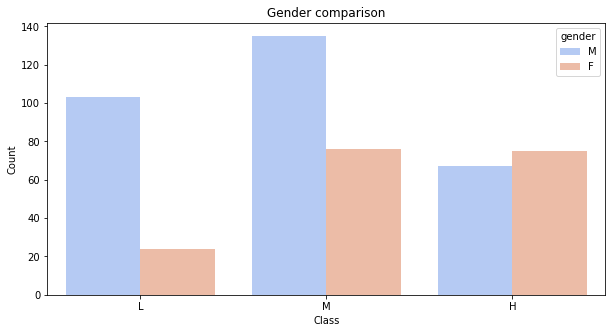

In [181]:
plot = sns.countplot(x='Class', hue='gender', data=data, order=['L', 'M', 'H'], palette='coolwarm')
plot.set(xlabel='Class', ylabel='Count', title='Gender comparison')
plt.show()

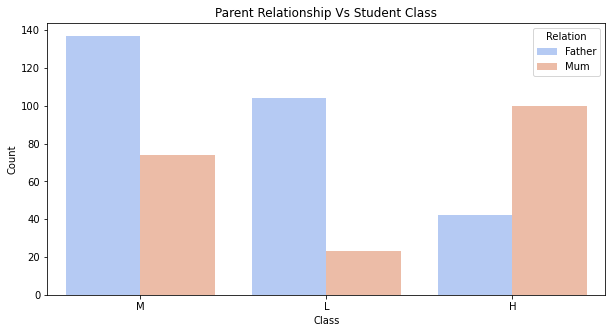

In [182]:
plot = sns.countplot(x='Class', hue='Relation', data=data, palette='coolwarm')
plot.set(xlabel='Class', ylabel='Count',title='Parent Relationship Vs Student Class')
plt.show()

Text(0.5, 1.0, 'Nationality Vs Gender')

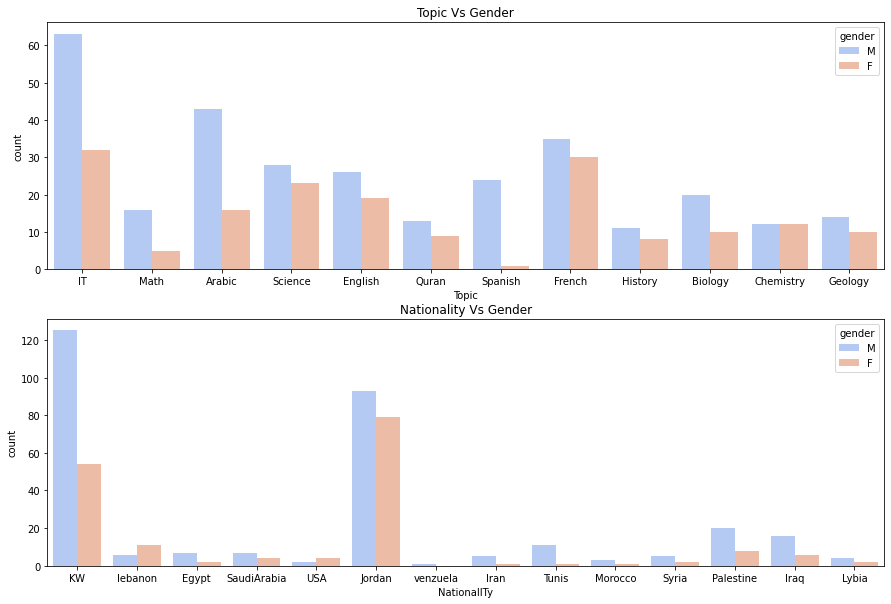

In [183]:

fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(15,10))
sns.countplot(x='Topic', hue='gender', data=data, ax=axis1 , palette='coolwarm' ).set_title('Topic Vs Gender')
sns.countplot(x='NationalITy', hue='gender', data=data, ax=axis2 , palette='coolwarm').set_title('Nationality Vs Gender')

Text(0.5, 1.0, 'Discussions of each Class')

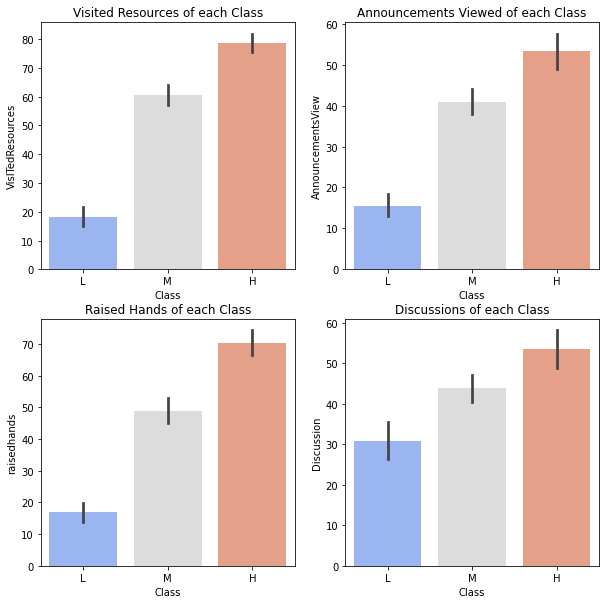

In [184]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))

sns.barplot(x='Class', y='VisITedResources', data=data, order=['L','M','H'], ax=axarr[0,0], palette='coolwarm').set_title('Visited Resources of each Class')
sns.barplot(x='Class', y='AnnouncementsView', data=data, order=['L','M','H'], ax=axarr[0,1], palette='coolwarm').set_title('Announcements Viewed of each Class')
sns.barplot(x='Class', y='raisedhands', data=data, order=['L','M','H'], ax=axarr[1,0], palette='coolwarm').set_title( 'Raised Hands of each Class')
sns.barplot(x='Class', y='Discussion', data=data, order=['L','M','H'], ax=axarr[1,1], palette='coolwarm').set_title('Discussions of each Class')

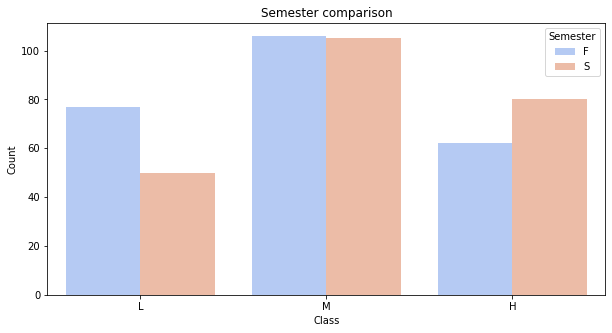

In [185]:
sem = sns.countplot(x='Class', hue='Semester', order=['L', 'M', 'H'], data=data, palette='coolwarm')
sem.set(xlabel='Class', ylabel='Count', title='Semester comparison')
plt.show()

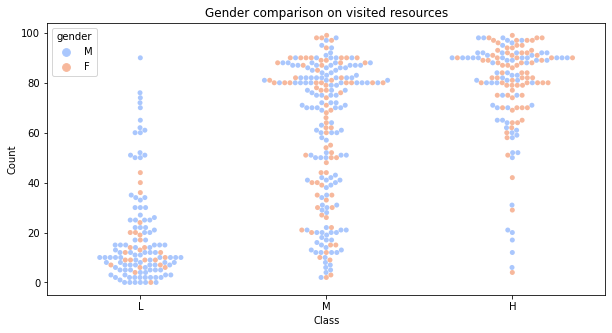

In [186]:
plot = sns.swarmplot(x='Class', y='VisITedResources', hue='gender', order=['L', 'M', 'H'], 
              data=data, palette='coolwarm')
plot.set(xlabel='Class', ylabel='Count', title='Gender comparison on visited resources')
plt.rcParams['figure.figsize']=(10,5)
plt.show()

In [187]:
X = data.drop('Class', axis=1)
y = data['Class']

# Encoding our categorical columns in X
labelEncoder = LabelEncoder()
cat_columns = X.dtypes.pipe(lambda x: x[x == 'object']).index
for col in cat_columns:
    X[col] = labelEncoder.fit_transform(X[col])

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

In [188]:
keys = []
scores = []
models = {'Logistic Regression': LogisticRegression(), 'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(n_estimators=300, random_state=52)}
for k,v in models.items():
    mod = v
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    print('Results for: ' + str(k) + '\n')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    acc = accuracy_score(y_test, pred)
    print("accuracy is "+ str(acc)) 
    print('\n' + '\n')
    keys.append(k)
    scores.append(acc)
    table = pd.DataFrame({'model':keys, 'accuracy score':scores})

print(table)


Results for: Logistic Regression

[[33  1 18]
 [ 0 30  6]
 [ 5  9 42]]
              precision    recall  f1-score   support

           H       0.87      0.63      0.73        52
           L       0.75      0.83      0.79        36
           M       0.64      0.75      0.69        56

    accuracy                           0.73       144
   macro avg       0.75      0.74      0.74       144
weighted avg       0.75      0.73      0.73       144

accuracy is 0.7291666666666666



Results for: Decision Tree

[[33  0 19]
 [ 2 29  5]
 [12  5 39]]
              precision    recall  f1-score   support

           H       0.70      0.63      0.67        52
           L       0.85      0.81      0.83        36
           M       0.62      0.70      0.66        56

    accuracy                           0.70       144
   macro avg       0.72      0.71      0.72       144
weighted avg       0.71      0.70      0.70       144

accuracy is 0.7013888888888888



Results for: Random Forest

[[36  

In [203]:
cols = data.columns.tolist()
labels = y.unique()

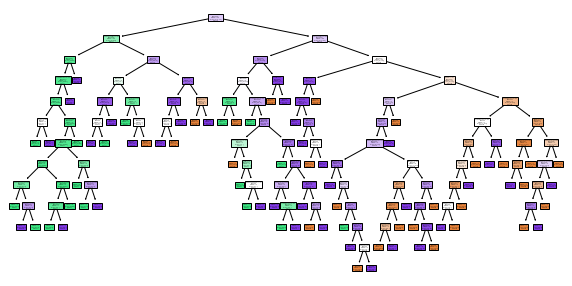

In [204]:
decisionTree = models['Decision Tree']
plot_tree(decisionTree, filled=True, feature_names = cols, class_names = labels)
plt.show()

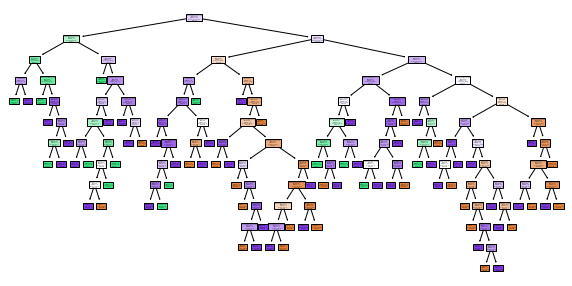

In [205]:
rfs = models['Random Forest']
plot_tree(rfs.estimators_[0], filled=True, feature_names = cols, class_names = labels)
plt.show()

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

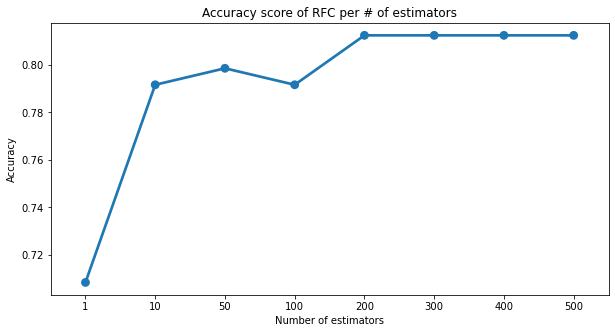

In [190]:
# Exploring the number of estimators in the random forest
score = []
est = []
estimators = [1, 10, 50, 100, 200, 300, 400, 500]
for e in estimators:
    rfc1 = RandomForestClassifier(n_estimators=e, random_state=52)
    pred1 = rfc1.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred1)
    score.append(accuracy)
    est.append(e)
plot = sns.pointplot(x=est, y=score)
plot.set(xlabel='Number of estimators', ylabel='Accuracy', 
         title='Accuracy score of RFC per # of estimators')
plt.show()

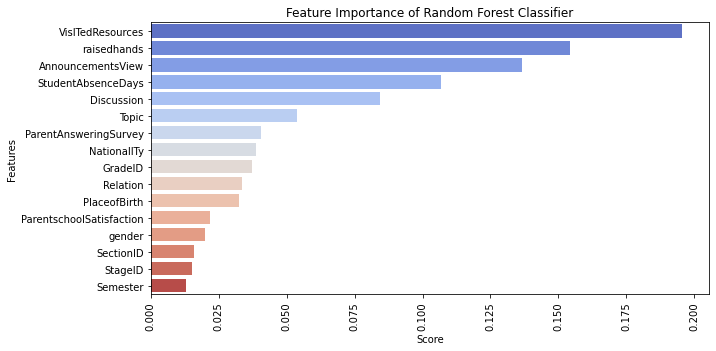

In [207]:
rfc = RandomForestClassifier(n_estimators=200, random_state=52)
pred = rfc.fit(X_train, y_train).predict(X_test)
dn = {'features':X.columns, 'score':rfc.feature_importances_}
df = pd.DataFrame.from_dict(data=dn).sort_values(by='score', ascending=False)
plot = sns.barplot(x='score', y='features', data=df, orient='h', palette='coolwarm')
plot.set(xlabel='Score', ylabel='Features', 
         title='Feature Importance of Random Forest Classifier')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

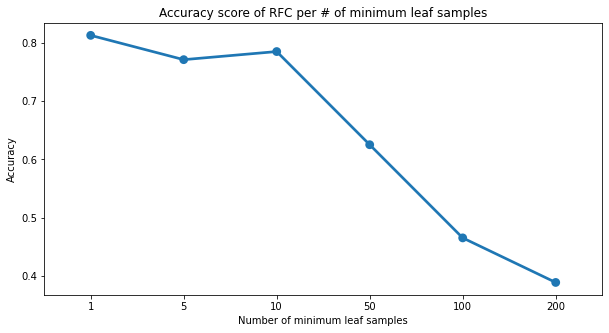

In [191]:
# Exploring minimum leaf samples
score = []
leaf = []
leaf_options = [1, 5, 10, 50, 100, 200]
for l in leaf_options:
    rfc2 = RandomForestClassifier(n_estimators=200, random_state=52, min_samples_leaf=l)
    pred2 = rfc2.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred2)
    score.append(accuracy)
    leaf.append(l)
plot = sns.pointplot(x=leaf, y=score)
plot.set(xlabel='Number of minimum leaf samples', ylabel='Accuracy', 
         title='Accuracy score of RFC per # of minimum leaf samples')
plt.show()